In [1]:
import json
import pandas as pd

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
movies = pd.read_csv("tmdb_5000_movies.csv")
credits = pd.read_csv('tmdb_5000_credits.csv')

In [4]:
data = pd.read_csv(r'movie_metadata.csv')

In [5]:
data.head(3)

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0
2,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,...,994.0,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000


In [6]:
data.shape

(5043, 28)

<AxesSubplot: >

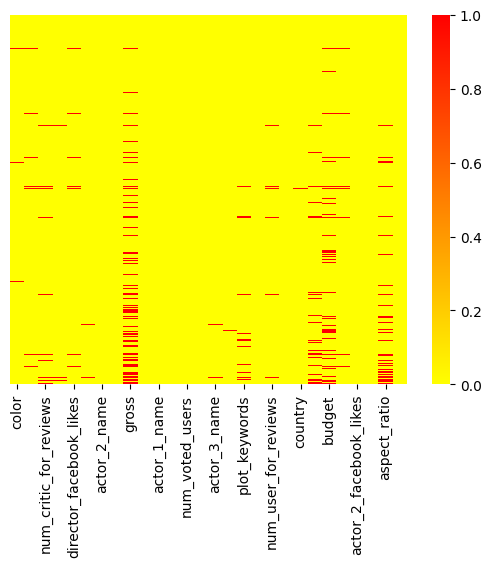

In [7]:
sns.heatmap(data.isnull(),yticklabels=False,cbar=True,cmap='autumn_r')

<AxesSubplot: >

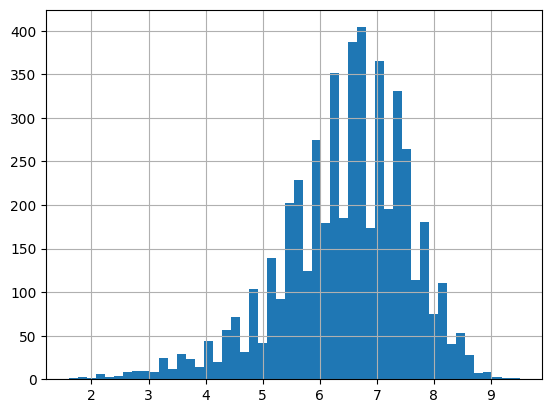

In [8]:
data['imdb_score'].hist(bins=50)

<AxesSubplot: xlabel='language'>

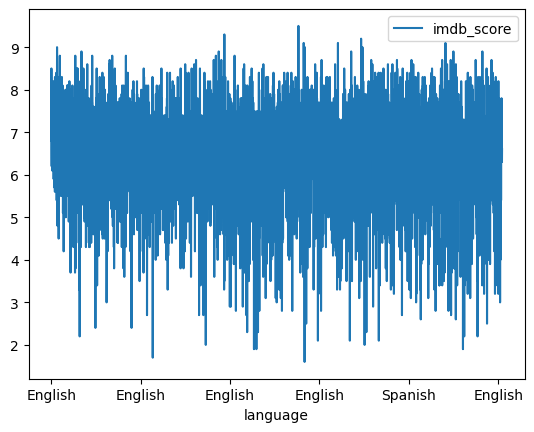

In [9]:
data.plot('language','imdb_score')

<AxesSubplot: xlabel='language'>

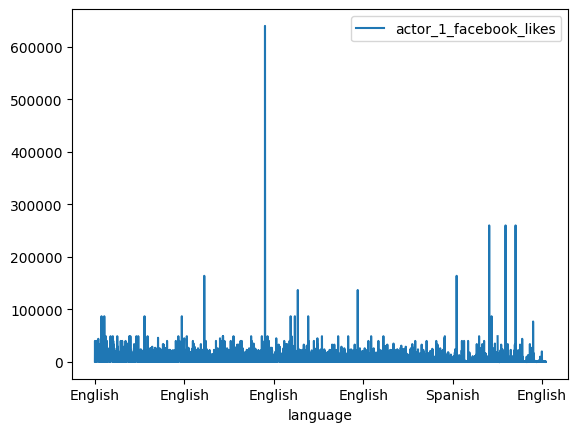

In [10]:
data.plot('language','actor_1_facebook_likes')

<AxesSubplot: xlabel='vote_average', ylabel='vote_count'>

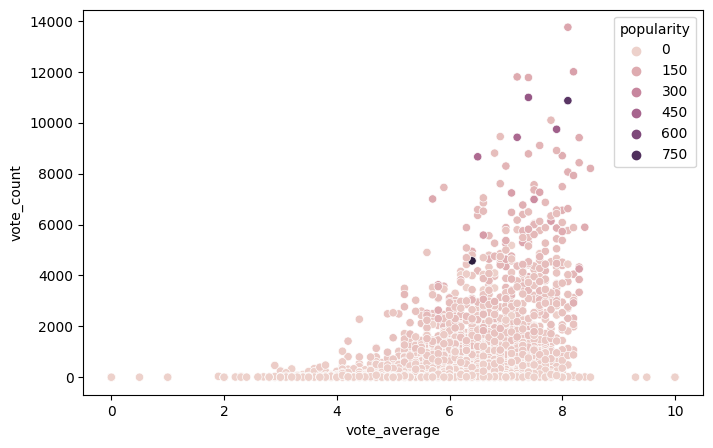

In [12]:
plt.figure(figsize=[8,5])
sns.scatterplot(x=movies['vote_average'],y=movies['vote_count'],hue=movies['popularity'])

In [13]:
compare = data[['director_name','imdb_score','num_critic_for_reviews','actor_1_facebook_likes','actor_2_facebook_likes']]

C:\Users\ydvis\AppData\Local\Temp\ipykernel_15584\844613366.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(compare.corr(),annot=True)


<AxesSubplot: >

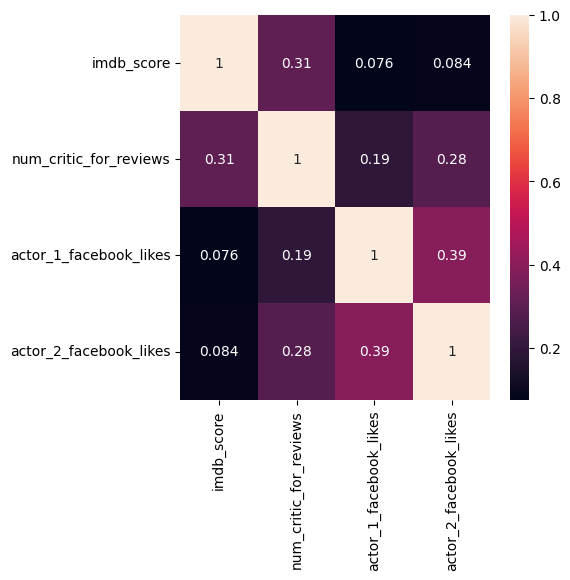

In [14]:
plt.figure(figsize=[5,5])
sns.heatmap(compare.corr(),annot=True)

In [15]:
df = data[['genres', 'movie_title', 'imdb_score', 'movie_imdb_link']].copy()

In [16]:
df.head(3)

,genres,movie_title,imdb_score,movie_imdb_link
0,Action|Adventure|Fantasy|Sci-Fi,Avatar,7.9,http://www.imdb.com/title/tt0499549/?ref_=fn_t...
1,Action|Adventure|Fantasy,Pirates of the Caribbean: At World's End,7.1,http://www.imdb.com/title/tt0449088/?ref_=fn_t...
2,Action|Adventure|Thriller,Spectre,6.8,http://www.imdb.com/title/tt2379713/?ref_=fn_t...


<BarContainer object of 5043 artists>

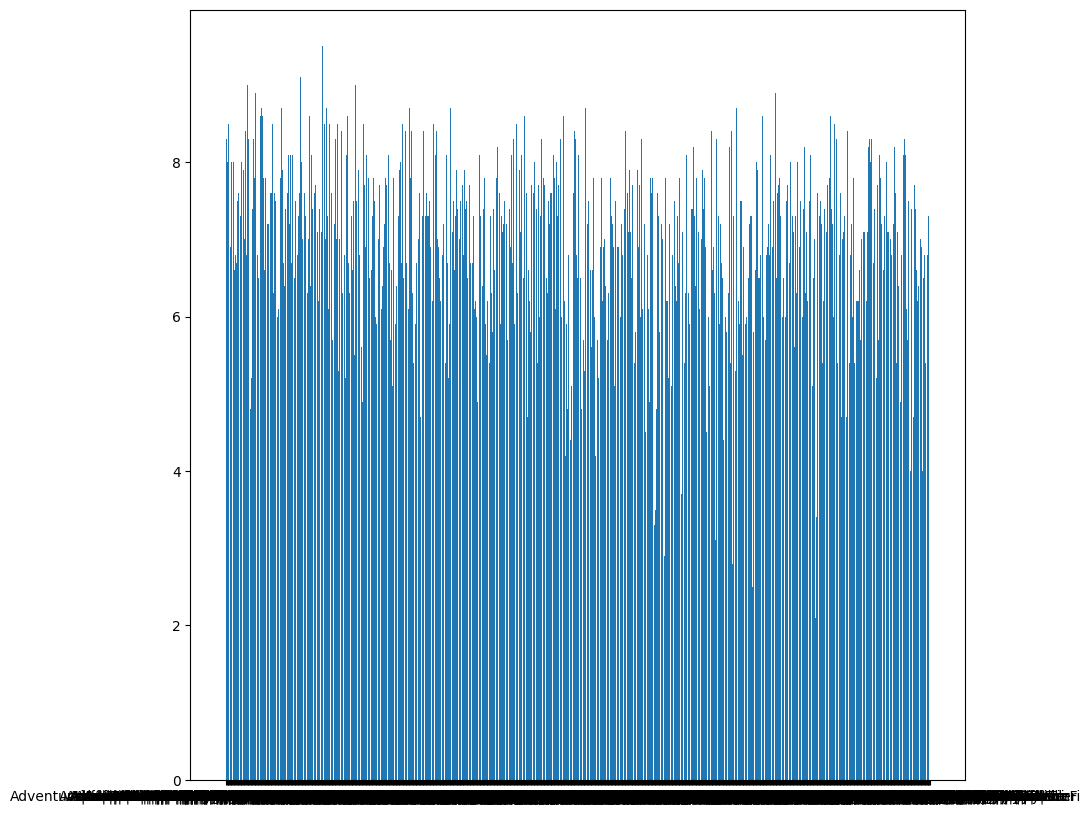

In [17]:
plt.figure(figsize=[10,10])
plt.bar(df['genres'],df['imdb_score'])

<AxesSubplot: >

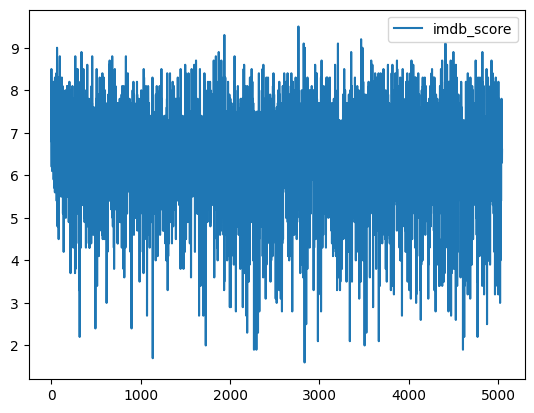

In [18]:
df.plot()

In [19]:
genres_all_movies = [df.loc[i]['genres'].split('|') for i in df.index]

In [20]:
genres = sorted(list(set([item for sublist in genres_all_movies for item in sublist])))

In [21]:
genres

['Action',
 'Adventure',
 'Animation',
 'Biography',
 'Comedy',
 'Crime',
 'Documentary',
 'Drama',
 'Family',
 'Fantasy',
 'Film-Noir',
 'Game-Show',
 'History',
 'Horror',
 'Music',
 'Musical',
 'Mystery',
 'News',
 'Reality-TV',
 'Romance',
 'Sci-Fi',
 'Short',
 'Sport',
 'Thriller',
 'War',
 'Western']

In [22]:
df.head(3)

,genres,movie_title,imdb_score,movie_imdb_link
0,Action|Adventure|Fantasy|Sci-Fi,Avatar,7.9,http://www.imdb.com/title/tt0499549/?ref_=fn_t...
1,Action|Adventure|Fantasy,Pirates of the Caribbean: At World's End,7.1,http://www.imdb.com/title/tt0449088/?ref_=fn_t...
2,Action|Adventure|Thriller,Spectre,6.8,http://www.imdb.com/title/tt2379713/?ref_=fn_t...


In [23]:
full_data = list()
movie_titles = list()

In [24]:
for i in df.index:
    
    movie_titles.append((df.loc[i]['movie_title'].strip(), i, df.loc[i]['movie_imdb_link'].strip()))
    # Add list of genres of the movies (1/0) to movie data
    movie_data = [1 if genre in df.loc[i]['genres'].split('|') else 0 for genre in genres]  
    movie_data.append(df.loc[i]['imdb_score'])
    # Add record of movie to main data list
    full_data.append(movie_data)

In [25]:
df.head(3)

,genres,movie_title,imdb_score,movie_imdb_link
0,Action|Adventure|Fantasy|Sci-Fi,Avatar,7.9,http://www.imdb.com/title/tt0499549/?ref_=fn_t...
1,Action|Adventure|Fantasy,Pirates of the Caribbean: At World's End,7.1,http://www.imdb.com/title/tt0449088/?ref_=fn_t...
2,Action|Adventure|Thriller,Spectre,6.8,http://www.imdb.com/title/tt2379713/?ref_=fn_t...


In [26]:
data_dump = r'data.json'
titles_dump = r'titles.json'
with open(data_dump, 'w+', encoding='utf-8') as f:
    json.dump(full_data, f)
with open(titles_dump, 'w+', encoding='utf-8') as f:
    json.dump(movie_titles, f)